### EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_excel("df_2023_portfolios.xlsx")
#df = df.set_index('Банк_словарь')
df = df.drop(columns=['Векселя', 'Облигации', 'Привлеченные от ЦБ РФ', 'НОСТРО-счета'])

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
DF = df.set_index('Банк_словарь')
DF.describe(include = 'all')

,Активы нетто,Кредитный портфель,Просроченная задолженность в кредитном портфеле,Вложения в ценные бумаги,Вложения в акции,Вложения в векселя,Вложения в капиталы других организаций,Вложения в облигации,Высоколиквидные активы,Кредиты предприятиям и организациям,...,Основные средства и нематериальные активы,Выданные МБК,Прочие активы,Размещенные МБК в ЦБ РФ,Вклады физических лиц,Выпущенные облигации и векселя,Капитал (по форме 123),Привлеченные МБК,Средства предприятий и организаций,ФЛ Счета
count,3.390000e+02,3.130000e+02,2.510000e+02,2.200000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,...,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,4.605784e+08,2.971556e+08,2.615897e+06,8.786365e+07,1.358640e+06,6.839593e+04,1.045309e+07,5.559362e+07,4.116433e+07,1.816136e+08,...,6.200341e+06,4.872350e+07,2.265160e+07,5.069681e+06,7.975045e+07,5.770250e+06,4.375377e+07,5.892343e+07,1.631385e+08,4.590497e+07
std,3.282923e+09,2.357101e+09,1.405869e+07,5.446525e+08,8.189083e+06,7.033213e+05,9.529792e+07,4.349955e+08,2.273472e+08,1.435901e+09,...,5.226686e+07,2.982058e+08,1.580440e+08,2.099374e+07,6.841435e+08,4.642234e+07,3.609534e+08,4.044099e+08,1.099664e+09,2.803399e+08
min,1.087760e+05,2.110000e+02,1.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.860000e+02,0.000000e+00,...,2.930000e+02,0.000000e+00,1.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.383053e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.724217e+06,7.419480e+05,9.705000e+02,4.848495e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.361670e+05,2.515840e+05,...,4.848950e+04,7.375000e+05,7.742050e+04,0.000000e+00,1.786950e+04,0.000000e+00,6.669840e+05,0.000000e+00,5.417920e+05,3.589005e+05
50%,1.311580e+07,3.311814e+06,1.568500e+04,3.012424e+06,0.000000e+00,0.000000e+00,0.000000e+00,3.032400e+05,1.097162e+06,1.670654e+06,...,1.905040e+05,2.561778e+06,4.512900e+05,2.580000e+05,1.173656e+06,0.000000e+00,2.160285e+06,0.000000e+00,2.260789e+06,1.257827e+06
75%,6.558632e+07,1.562038e+07,2.242740e+05,1.718463e+07,6.200500e+03,0.000000e+00,1.965000e+02,5.647584e+06,6.772682e+06,7.163006e+06,...,6.538270e+05,1.648126e+07,2.346822e+06,1.533540e+06,7.412208e+06,4.722000e+03,1.015161e+07,1.479874e+06,1.418314e+07,6.759412e+06
max,5.069572e+10,3.656594e+10,1.552683e+08,6.292502e+09,9.104845e+07,1.120498e+07,1.270984e+09,6.246095e+09,2.837424e+09,2.163333e+10,...,6.763953e+08,5.141593e+09,2.036301e+09,2.600000e+08,1.145818e+10,7.219752e+08,6.009351e+09,4.682226e+09,1.375164e+10,3.645563e+09


In [4]:
#df.describe(include = 'all').to_excel("descrb_banki_portfolio.xlsx")  

#### Опишем распределение кредитных портфелей

11


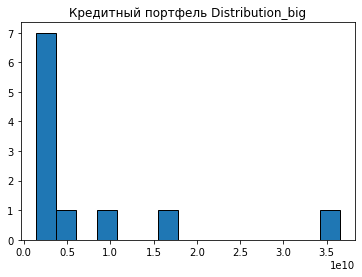

In [5]:
plt.hist(df['Кредитный портфель'][df['Кредитный портфель'] > 1000000000], bins = 15,  edgecolor = 'black');
plt.title('Кредитный портфель Distribution_big');
print(len(df['Кредитный портфель'][df['Кредитный портфель'] > 1000000000]))

23

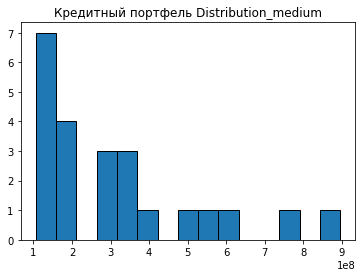

In [6]:
plt.hist(df['Кредитный портфель'][(100000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 1000000000)], bins = 15,  edgecolor = 'black');
plt.title('Кредитный портфель Distribution_medium');

len(df['Кредитный портфель'][(100000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 1000000000)])

56

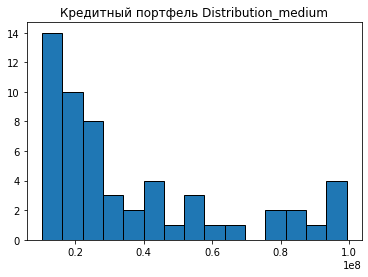

In [7]:
plt.hist(df['Кредитный портфель'][(10000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 100000000)], bins = 15,  edgecolor = 'black');
plt.title('Кредитный портфель Distribution_medium');

len(df['Кредитный портфель'][(10000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 100000000)])

127

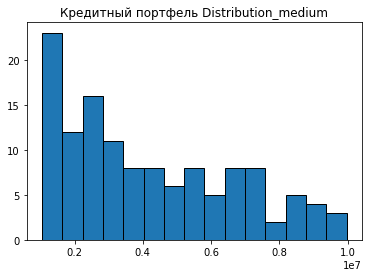

In [8]:
plt.hist(df['Кредитный портфель'][(1000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 10000000)], bins = 15,  edgecolor = 'black');
plt.title('Кредитный портфель Distribution_medium');

len(df['Кредитный портфель'][(1000000 < df['Кредитный портфель']) & (df['Кредитный портфель'] < 10000000)])

96

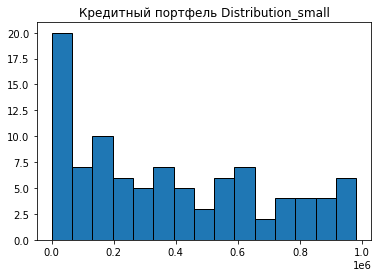

In [9]:
plt.hist(df['Кредитный портфель'][df['Кредитный портфель'] < 1000000], bins = 15,  edgecolor = 'black');
plt.title('Кредитный портфель Distribution_small');
len(df['Кредитный портфель'][df['Кредитный портфель'] < 1000000])

#### Проверка на мультиколлинеарность

In [10]:
(df[['Вложения в акции', 'Вложения в векселя', 'Вложения в облигации', 'Вложения в капиталы других организаций', 'Кредиты предприятиям и организациям', 'Кредиты физическим лицам', 'ЛОРО-счета', 'Основные средства и нематериальные активы','Выданные МБК', 'Прочие активы']].corr().sum()-1)/9

Вложения в акции                             0.487166
Вложения в векселя                           0.075322
Вложения в облигации                         0.730508
Вложения в капиталы других организаций       0.712578
Кредиты предприятиям и организациям          0.718656
Кредиты физическим лицам                     0.676568
ЛОРО-счета                                   0.554601
Основные средства и нематериальные активы    0.713042
Выданные МБК                                 0.232089
Прочие активы                                0.733465
dtype: float64

In [11]:
df[['Вложения в акции', 'Вложения в векселя', 'Вложения в облигации', 'Вложения в капиталы других организаций', 'Кредиты предприятиям и организациям', 'Кредиты физическим лицам', 'ЛОРО-счета', 'Основные средства и нематериальные активы','Выданные МБК', 'Прочие активы']].corr().style.background_gradient(cmap='coolwarm')

,Вложения в акции,Вложения в векселя,Вложения в облигации,Вложения в капиталы других организаций,Кредиты предприятиям и организациям,Кредиты физическим лицам,ЛОРО-счета,Основные средства и нематериальные активы,Выданные МБК,Прочие активы
Вложения в акции,1.000000,0.052964,0.649720,0.624826,0.599094,0.513367,0.421553,0.635228,0.195257,0.692487
Вложения в векселя,0.052964,1.000000,0.084231,0.095005,0.125032,0.062882,0.030701,0.092193,0.034566,0.100325
Вложения в облигации,0.649720,0.084231,1.000000,0.971025,0.963320,0.939786,0.730040,0.978369,0.270783,0.987300
Вложения в капиталы других организаций,0.624826,0.095005,0.971025,1.000000,0.951675,0.887127,0.704609,0.967184,0.239263,0.972490
Кредиты предприятиям и организациям,0.599094,0.125032,0.963320,0.951675,1.000000,0.928543,0.729795,0.907926,0.314452,0.948064
Кредиты физическим лицам,0.513367,0.062882,0.939786,0.887127,0.928543,1.000000,0.723333,0.898960,0.239582,0.895532
ЛОРО-счета,0.421553,0.030701,0.730040,0.704609,0.729795,0.723333,1.000000,0.703232,0.234873,0.713277
Основные средства и нематериальные активы,0.635228,0.092193,0.978369,0.967184,0.907926,0.898960,0.703232,1.000000,0.251302,0.982988
Выданные МБК,0.195257,0.034566,0.270783,0.239263,0.314452,0.239582,0.234873,0.251302,1.000000,0.308721
Прочие активы,0.692487,0.100325,0.987300,0.972490,0.948064,0.895532,0.713277,0.982988,0.308721,1.000000


In [12]:
df[['Вклады физических лиц', 'Средства предприятий и организаций', 'ФЛ Счета', 'Выпущенные облигации и векселя', 'Капитал (по форме 123)', 'Привлеченные МБК']].corr().style.background_gradient(cmap='coolwarm')

,Вклады физических лиц,Средства предприятий и организаций,ФЛ Счета,Выпущенные облигации и векселя,Капитал (по форме 123),Привлеченные МБК
Вклады физических лиц,1.000000,0.901489,0.876786,0.935382,0.964999,0.660712
Средства предприятий и организаций,0.901489,1.000000,0.952969,0.895602,0.872864,0.798363
ФЛ Счета,0.876786,0.952969,1.000000,0.936073,0.883134,0.682457
Выпущенные облигации и векселя,0.935382,0.895602,0.936073,1.000000,0.933937,0.639219
Капитал (по форме 123),0.964999,0.872864,0.883134,0.933937,1.000000,0.600520
Привлеченные МБК,0.660712,0.798363,0.682457,0.639219,0.600520,1.000000


In [13]:
(df[['Вклады физических лиц', 'Средства предприятий и организаций', 'ФЛ Счета', 'Выпущенные облигации и векселя', 'Капитал (по форме 123)', 'Привлеченные МБК']].corr().sum()-1)/5

Вклады физических лиц                 0.867874
Средства предприятий и организаций    0.884257
ФЛ Счета                              0.866284
Выпущенные облигации и векселя        0.868043
Капитал (по форме 123)                0.851091
Привлеченные МБК                      0.676254
dtype: float64

#### Переходим к доля от активов и пассивов

In [14]:
df['Активы Итог'] = df['Вложения в акции'] + df['Вложения в векселя'] + df['Вложения в облигации'] + df['Вложения в капиталы других организаций'] + df['Кредиты предприятиям и организациям'] + df['Кредиты физическим лицам'] + df['ЛОРО-счета'] + df['Основные средства и нематериальные активы'] + df['Выданные МБК'] + df['Прочие активы']
df['Пассивы Итог'] = df['Вклады физических лиц'] + df['Средства предприятий и организаций'] + df['ФЛ Счета'] + df['Выпущенные облигации и векселя'] + df['Капитал (по форме 123)'] + df['Привлеченные МБК']

In [15]:
df_2 = pd.DataFrame()
df_2['Банк'] = df['Банк_словарь']
df_2['А_акции_доля'] = df['Вложения в акции']/df['Активы Итог']
df_2['А_векселя_доля'] = df['Вложения в векселя']/df['Активы Итог']
df_2['А_облигации_доля'] = df['Вложения в облигации']/df['Активы Итог']
df_2['А_капиталы_доля'] = df['Вложения в капиталы других организаций']/df['Активы Итог']
df_2['А_корп_кредиты_доля'] = df['Кредиты предприятиям и организациям']/df['Активы Итог']
df_2['А_физлица_доля'] = df['Кредиты физическим лицам']/df['Активы Итог']
df_2['А_ЛОРО_доля'] = df['ЛОРО-счета']/df['Активы Итог']
df_2['А_осн_средства_доля'] = df['Основные средства и нематериальные активы']/df['Активы Итог']
df_2['А_мбк_доля'] = df['Выданные МБК']/df['Активы Итог']
df_2['А_прочие_доля'] = df['Прочие активы']/df['Активы Итог']

df_2['П_вклады_физлиц_доля'] = df['Вклады физических лиц']/df['Пассивы Итог']
df_2['П_корп_средства_доля'] = df['Средства предприятий и организаций']/df['Пассивы Итог']
df_2['П_счета_физлиц_доля'] = df['ФЛ Счета']/df['Пассивы Итог']
df_2['П_облигации_векселя_доля'] = df['Выпущенные облигации и векселя']/df['Пассивы Итог']
df_2['П_капитал_доля'] = df['Капитал (по форме 123)']/df['Пассивы Итог']
df_2['П_мбк_доля'] = df['Привлеченные МБК']/df['Пассивы Итог']

df_2 = df_2[df_2['П_капитал_доля'] > - 0.1]

In [16]:
df_2

,Банк,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля
0,Сбербанк,0.000952,1.206493e-05,0.129813,0.026415,0.449607,0.308638,0.007065,0.014058,0.021119,0.042321,0.292119,0.350590,0.092941,0.018406,0.153205,0.092739
1,ВТБ,0.003354,0.000000e+00,0.184503,0.042916,0.424960,0.204919,0.006927,0.026645,0.030429,0.075347,0.194696,0.492168,0.081859,0.008043,0.072620,0.150614
2,Газпромбанк,0.002000,0.000000e+00,0.107434,0.040265,0.707183,0.054292,0.005505,0.007829,0.027098,0.048395,0.100437,0.502484,0.160175,0.019816,0.078182,0.138906
3,Альфа-Банк,0.003741,1.291383e-07,0.134795,0.001991,0.459535,0.254568,0.007232,0.011550,0.065584,0.061004,0.179709,0.438429,0.193794,0.028752,0.108740,0.050576
4,МКБ,0.004365,0.000000e+00,0.177455,0.001694,0.602633,0.044486,0.019442,0.002068,0.104695,0.043163,0.110018,0.491663,0.059327,0.006559,0.081392,0.251041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,АЗИЯПЭЙ,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.348959,0.001577,0.647667,0.001797,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
335,Промсвязьинвест,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.956269,0.041518,0.000000,0.278054,0.278054,0.000000,0.443891,0.000000
336,Петербургский Расчетный Центр,0.001231,0.000000e+00,0.000000,0.000266,0.000000,0.000000,0.011649,0.023612,0.941760,0.021482,0.000000,0.007266,0.007266,0.000000,0.985469,0.000000
337,Дальний Восток,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.237110,0.647549,0.115342,0.000000,0.107070,0.107070,0.000000,0.785860,0.000000


In [17]:
#df_2.describe().to_excel("descrb_banki_portfolio_share.xlsx")

#### Проверка на мультиколлинеарность для показателей долей

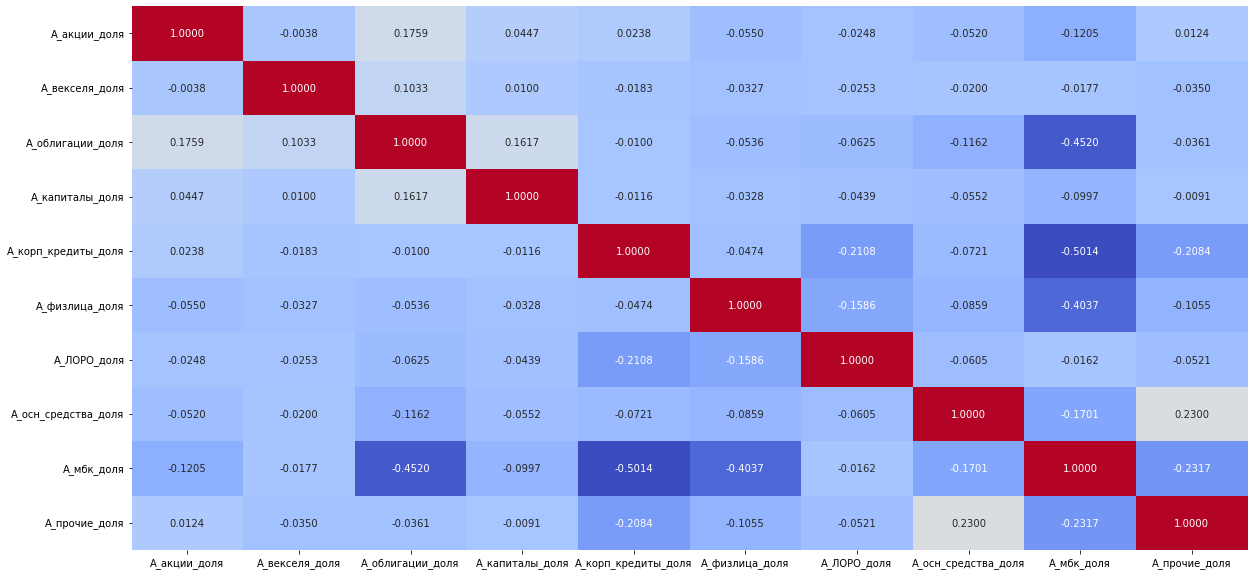

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_2[['А_акции_доля','А_векселя_доля','А_облигации_доля','А_капиталы_доля','А_корп_кредиты_доля','А_физлица_доля','А_ЛОРО_доля','А_осн_средства_доля','А_мбк_доля','А_прочие_доля']].corr(), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal");
#plt.savefig('result_1_corr_active.png', bbox_inches='tight', pad_inches=0.0)

In [19]:
df_2[['А_акции_доля','А_векселя_доля','А_облигации_доля','А_капиталы_доля','А_корп_кредиты_доля','А_физлица_доля','А_ЛОРО_доля','А_осн_средства_доля','А_мбк_доля','А_прочие_доля']].describe()

,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.004048,0.000710,0.106096,0.004637,0.236726,0.117073,0.028661,0.037403,0.395142,0.069505
std,0.015938,0.006504,0.151782,0.020330,0.202395,0.168409,0.095698,0.075524,0.284143,0.119090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000434
25%,0.000000,0.000000,0.000000,0.000000,0.039077,0.002910,0.000011,0.006597,0.158256,0.017274
50%,0.000000,0.000000,0.027100,0.000000,0.206402,0.042083,0.000269,0.015894,0.343573,0.036595
75%,0.000123,0.000000,0.167334,0.000006,0.396405,0.163690,0.007096,0.035312,0.616802,0.070860
max,0.145331,0.110266,0.801329,0.237631,0.829118,0.931771,0.753052,0.748207,0.986171,0.889865


In [20]:
(df_2[['А_акции_доля','А_векселя_доля','А_облигации_доля','А_капиталы_доля','А_корп_кредиты_доля','А_физлица_доля','А_ЛОРО_доля','А_осн_средства_доля','А_мбк_доля','А_прочие_доля']].corr().sum()-1)/9

А_акции_доля           0.000079
А_векселя_доля        -0.004378
А_облигации_доля      -0.032167
А_капиталы_доля       -0.003979
А_корп_кредиты_доля   -0.117353
А_физлица_доля        -0.108349
А_ЛОРО_доля           -0.072754
А_осн_средства_доля   -0.044673
А_мбк_доля            -0.223684
А_прочие_доля         -0.048386
dtype: float64

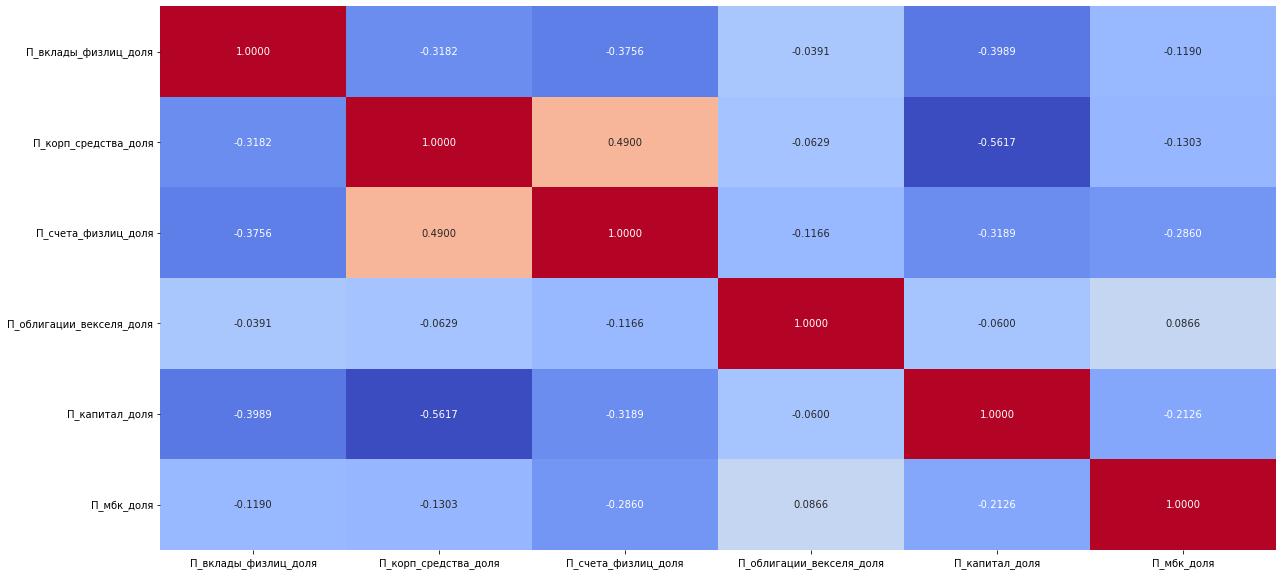

In [21]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_2[['П_вклады_физлиц_доля','П_корп_средства_доля', 'П_счета_физлиц_доля', 'П_облигации_векселя_доля','П_капитал_доля', 'П_мбк_доля']].corr(), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal");
#plt.savefig('result_2_corr_passive.png', bbox_inches='tight', pad_inches=0.0)

In [22]:
df_2[['П_вклады_физлиц_доля','П_корп_средства_доля', 'П_счета_физлиц_доля', 'П_облигации_векселя_доля','П_капитал_доля', 'П_мбк_доля']].describe()

,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.207516,0.272874,0.164687,0.007711,0.297218,0.049995
std,0.200408,0.157871,0.110958,0.034025,0.232096,0.122539
min,0.000000,0.000000,0.000000,0.000000,-0.096415,0.000000
25%,0.001663,0.161306,0.079646,0.000000,0.137369,0.000000
50%,0.181654,0.263559,0.147672,0.000000,0.219614,0.000000
75%,0.370155,0.378311,0.229270,0.000203,0.387934,0.027210
max,0.775606,0.876854,0.457003,0.380101,1.000000,0.882464


In [23]:
(df_2[['П_вклады_физлиц_доля','П_корп_средства_доля', 'П_счета_физлиц_доля', 'П_облигации_векселя_доля','П_капитал_доля', 'П_мбк_доля']].corr().sum()-1)/5

П_вклады_физлиц_доля       -0.250164
П_корп_средства_доля       -0.116619
П_счета_физлиц_доля        -0.121438
П_облигации_векселя_доля   -0.038406
П_капитал_доля             -0.310422
П_мбк_доля                 -0.132242
dtype: float64

In [24]:
df_2[['А_акции_доля','А_векселя_доля','А_облигации_доля','А_капиталы_доля','А_корп_кредиты_доля','А_физлица_доля','А_ЛОРО_доля','А_осн_средства_доля','А_мбк_доля','А_прочие_доля']].corr().style.background_gradient(cmap='coolwarm')

,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля
А_акции_доля,1.000000,-0.003774,0.175853,0.044733,0.023835,-0.055008,-0.024846,-0.051964,-0.120549,0.012435
А_векселя_доля,-0.003774,1.000000,0.103349,0.010024,-0.018266,-0.032686,-0.025278,-0.020048,-0.017694,-0.035029
А_облигации_доля,0.175853,0.103349,1.000000,0.161670,-0.010022,-0.053553,-0.062491,-0.116151,-0.452033,-0.036123
А_капиталы_доля,0.044733,0.010024,0.161670,1.000000,-0.011569,-0.032802,-0.043902,-0.055171,-0.099704,-0.009090
А_корп_кредиты_доля,0.023835,-0.018266,-0.010022,-0.011569,1.000000,-0.047372,-0.210818,-0.072131,-0.501449,-0.208385
А_физлица_доля,-0.055008,-0.032686,-0.053553,-0.032802,-0.047372,1.000000,-0.158601,-0.085938,-0.403692,-0.105487
А_ЛОРО_доля,-0.024846,-0.025278,-0.062491,-0.043902,-0.210818,-0.158601,1.000000,-0.060541,-0.016200,-0.052113
А_осн_средства_доля,-0.051964,-0.020048,-0.116151,-0.055171,-0.072131,-0.085938,-0.060541,1.000000,-0.170134,0.230025
А_мбк_доля,-0.120549,-0.017694,-0.452033,-0.099704,-0.501449,-0.403692,-0.016200,-0.170134,1.000000,-0.231703
А_прочие_доля,0.012435,-0.035029,-0.036123,-0.009090,-0.208385,-0.105487,-0.052113,0.230025,-0.231703,1.000000


In [25]:
(df_2[['А_акции_доля','А_векселя_доля','А_облигации_доля','А_капиталы_доля','А_корп_кредиты_доля','А_физлица_доля','А_ЛОРО_доля','А_осн_средства_доля','А_мбк_доля','А_прочие_доля']].corr().sum()-1)/9

А_акции_доля           0.000079
А_векселя_доля        -0.004378
А_облигации_доля      -0.032167
А_капиталы_доля       -0.003979
А_корп_кредиты_доля   -0.117353
А_физлица_доля        -0.108349
А_ЛОРО_доля           -0.072754
А_осн_средства_доля   -0.044673
А_мбк_доля            -0.223684
А_прочие_доля         -0.048386
dtype: float64

In [26]:
#df_2.to_excel('portfolio_share_raw.xlsx')

### Кластеризация

#### K-means

In [27]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn import metrics 
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

from clustering_functions import K_means_cluster

In [28]:
df_2 = df_2.set_index('Банк')

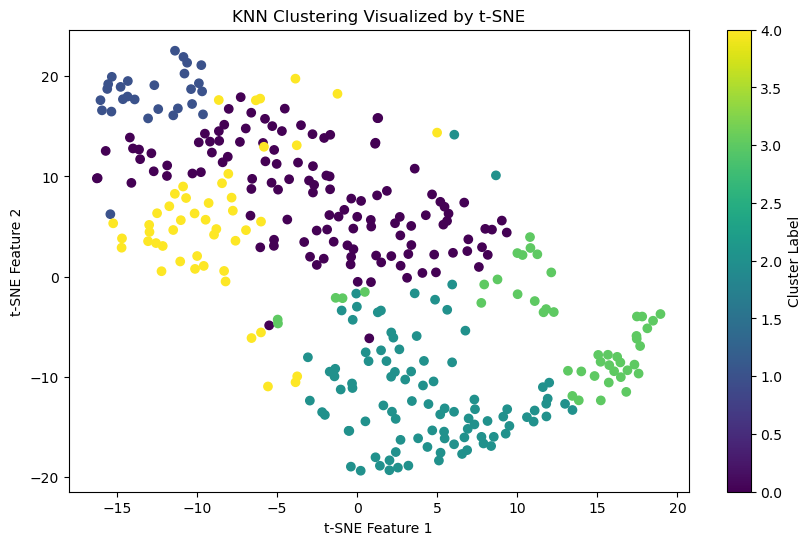

Estimated number of clusters: 5
Estimated number of noise points: 0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=20)
labels = kmeans.fit_predict(df_2)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=123) 
df_2_tsne = tsne.fit_transform(df_2)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_2_tsne[:, 0], df_2_tsne[:, 1], c=labels, cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster Label')
plt.title('KNN Clustering Visualized by t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

df_2_knn = df_2.copy()
df_2_knn['Cluster'] = labels

In [30]:
#df_2_knn.to_excel('knn_banks_clusters.xlsx')
df_2_knn

,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля,Cluster
Банк,,,,,,,,,,,,,,,,,
Сбербанк,0.000952,1.206493e-05,0.129813,0.026415,0.449607,0.308638,0.007065,0.014058,0.021119,0.042321,0.292119,0.350590,0.092941,0.018406,0.153205,0.092739,0
ВТБ,0.003354,0.000000e+00,0.184503,0.042916,0.424960,0.204919,0.006927,0.026645,0.030429,0.075347,0.194696,0.492168,0.081859,0.008043,0.072620,0.150614,0
Газпромбанк,0.002000,0.000000e+00,0.107434,0.040265,0.707183,0.054292,0.005505,0.007829,0.027098,0.048395,0.100437,0.502484,0.160175,0.019816,0.078182,0.138906,0
Альфа-Банк,0.003741,1.291383e-07,0.134795,0.001991,0.459535,0.254568,0.007232,0.011550,0.065584,0.061004,0.179709,0.438429,0.193794,0.028752,0.108740,0.050576,0
МКБ,0.004365,0.000000e+00,0.177455,0.001694,0.602633,0.044486,0.019442,0.002068,0.104695,0.043163,0.110018,0.491663,0.059327,0.006559,0.081392,0.251041,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
АЗИЯПЭЙ,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.348959,0.001577,0.647667,0.001797,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3
Промсвязьинвест,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.956269,0.041518,0.000000,0.278054,0.278054,0.000000,0.443891,0.000000,2
Петербургский Расчетный Центр,0.001231,0.000000e+00,0.000000,0.000266,0.000000,0.000000,0.011649,0.023612,0.941760,0.021482,0.000000,0.007266,0.007266,0.000000,0.985469,0.000000,3


In [31]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(df_2, df_2_knn['Cluster'])
davies_bouldin = davies_bouldin_score(df_2, df_2_knn['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_2, df_2_knn['Cluster'])
print(f'silhouette_avg = {round(silhouette_avg,2)}')
print(f'davies_bouldin = {round(davies_bouldin,2)}')
print(f'calinski_harabasz = {round(calinski_harabasz,2)}')

silhouette_avg = 0.24
davies_bouldin = 1.51
calinski_harabasz = 83.03


In [32]:
#knn_centers = pd.DataFrame(kmeans.cluster_centers_).to_excel('knn_centers.xlsx')

In [33]:
df_2_knn[df_2_knn['Cluster'] == 1]

,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля,Cluster
Банк,,,,,,,,,,,,,,,,,
Тинькофф Банк,1.710662e-04,0.000000,0.198766,0.000042,0.024769,0.476783,2.288337e-04,0.030928,0.202371,0.065941,6.080462e-01,0.114251,0.065142,1.039037e-04,0.185924,0.026533,1
Почта Банк,4.148018e-06,0.000000,0.000000,0.000780,0.007432,0.657526,9.625092e-06,0.009020,0.292457,0.032771,5.707314e-01,0.047132,0.000917,0.000000e+00,0.176415,0.204805,1
МТС Банк,0.000000e+00,0.000000,0.067218,0.003114,0.023006,0.697912,5.603851e-03,0.046601,0.065092,0.091453,3.867998e-01,0.264704,0.069591,4.295504e-02,0.172701,0.063249,1
Хоум Банк,1.164945e-04,0.000000,0.074447,0.010661,0.052887,0.698391,5.588060e-03,0.013485,0.092353,0.052071,5.423965e-01,0.036184,0.004835,4.595415e-02,0.290855,0.079775,1
Абсолют Банк,1.392489e-06,0.000000,0.183578,0.009498,0.258779,0.389408,9.500085e-05,0.015967,0.070282,0.072392,3.083582e-01,0.326690,0.155688,8.779643e-03,0.172583,0.027902,1
Русский Стандарт,3.597936e-03,0.000000,0.394402,0.037530,0.002009,0.361806,1.193461e-04,0.033107,0.000267,0.167161,6.241793e-01,0.042334,0.042144,0.000000e+00,0.165737,0.125607,1
Азиатско-Тихоокеанский Банк,1.039763e-03,0.000021,0.134362,0.001691,0.178700,0.430475,1.122364e-02,0.027060,0.170507,0.044920,3.259166e-01,0.299698,0.220683,4.043476e-07,0.124380,0.029323,1
Кредит Европа Банк,0.000000e+00,0.000000,0.000000,0.011557,0.111084,0.526728,4.980829e-02,0.002258,0.183789,0.114776,3.086254e-01,0.404624,0.151900,0.000000e+00,0.134741,0.000109,1
Ренессанс Банк,0.000000e+00,0.001348,0.075252,0.000004,0.001941,0.746858,0.000000e+00,0.060458,0.041300,0.072840,7.656926e-01,0.000569,0.000518,6.296478e-02,0.170256,0.000000,1


In [34]:
knn_centers = pd.DataFrame(kmeans.cluster_centers_)
knn_centers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.005384,0.000649,0.077921,0.004941,0.442866,0.114326,0.010933,0.038232,0.250846,0.053902,0.300494,0.273429,0.156189,0.008970,0.225016,0.035903
1,0.000252,0.000051,0.067017,0.002973,0.094485,0.560770,0.004137,0.025772,0.190537,0.054008,0.418703,0.181615,0.093406,0.018452,0.205762,0.082062
2,0.002046,0.001161,0.042037,0.001219,0.109486,0.037998,0.028838,0.018348,0.712484,0.046384,0.078757,0.379932,0.256383,0.006494,0.245916,0.032519
3,0.000363,0.000102,0.040788,0.005206,0.078324,0.043686,0.106017,0.071650,0.500864,0.153000,0.049304,0.089415,0.072103,0.000351,0.769228,0.019599
4,0.010445,0.000928,0.394481,0.011166,0.199954,0.100912,0.012320,0.046946,0.139257,0.083591,0.261932,0.287034,0.132782,0.007961,0.177364,0.132927


#### DBSCAN

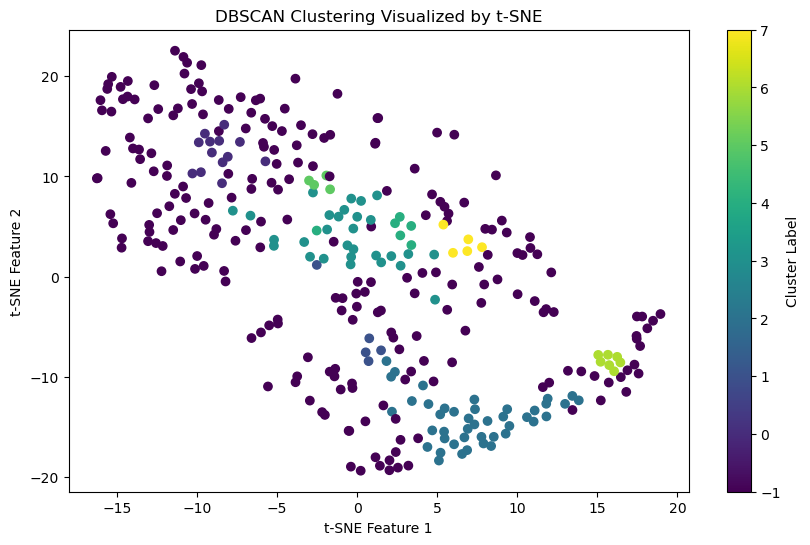

Estimated number of clusters: 8
Estimated number of noise points: 224


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_2)

tsne = TSNE(n_components=2, random_state=123)
df_2_tsne = tsne.fit_transform(df_2)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_2_tsne[:, 0], df_2_tsne[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering Visualized by t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

In [36]:
df_2_dbscan = df_2.copy()
df_2_dbscan['Cluster'] = labels_dbscan

silhouette_avg = silhouette_score(df_2, df_2_dbscan['Cluster'])
davies_bouldin = davies_bouldin_score(df_2, df_2_dbscan['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_2, df_2_dbscan['Cluster'])
print(f'silhouette_avg = {round(silhouette_avg,2)}')
print(f'davies_bouldin = {round(davies_bouldin,2)}')
print(f'calinski_harabasz = {round(calinski_harabasz,2)}')

silhouette_avg = -0.18
davies_bouldin = 1.95
calinski_harabasz = 12.88


#### SOM

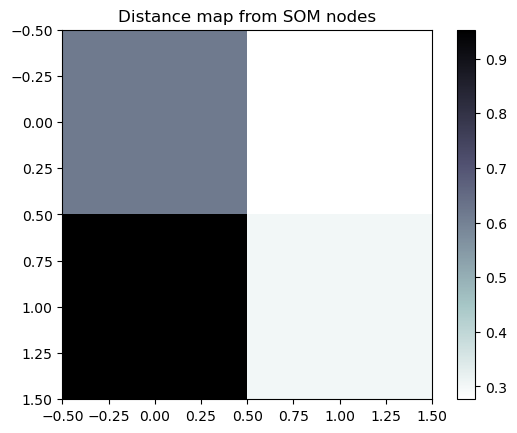

In [37]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleSOM:
    def __init__(self, height, width, input_dim, learning_rate=0.1, radius=None, decay_function=None):
        self.height = height
        self.width = width
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.radius = radius if radius else max(height, width) / 2
        self.decay_function = decay_function if decay_function else self.default_decay
        self.weights = np.random.random((height, width, input_dim))

    def default_decay(self, initial, t, max_iter):
        return initial * np.exp(-t / max_iter)

    def distance_map(self):
        return np.sum((self.weights - self.weights.mean(axis=2, keepdims=True))**2, axis=2)

    def winner(self, x):
        idx = np.argmin(np.linalg.norm(self.weights - x, axis=2))
        return idx // self.width, idx % self.width

    def update(self, x, t, max_iter):
        lr_t = self.decay_function(self.learning_rate, t, max_iter)
        rad_t = self.decay_function(self.radius, t, max_iter)
        winner_idx = self.winner(x)
        for i in range(self.height):
            for j in range(self.width):
                dist = np.linalg.norm(np.array([i, j]) - np.array(winner_idx))
                if dist <= rad_t:
                    influence = np.exp(-dist**2 / (2 * (rad_t**2)))
                    self.weights[i, j] += lr_t * influence * (x - self.weights[i, j])

    def train(self, data, num_iterations):
        for t in range(num_iterations):
            for x in data:
                self.update(x, t, num_iterations)


data = df_2.values

som = SimpleSOM(2, 2, data.shape[1], learning_rate=0.1)
som.train(data, 100)

plt.imshow(som.distance_map(), cmap='bone_r')
plt.colorbar()
plt.title('Distance map from SOM nodes')
plt.show()

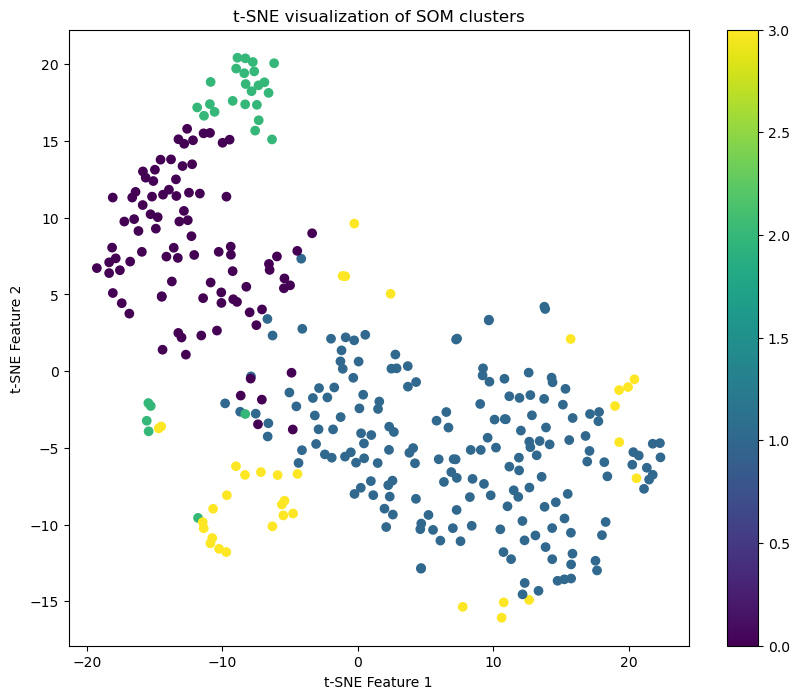

Estimated number of clusters: 4
Estimated number of noise points: 0


In [38]:
from sklearn.manifold import TSNE

cluster_labels = np.array([som.winner(x) for x in data])
linear_labels = cluster_labels[:, 0] * som.width + cluster_labels[:, 1]

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=linear_labels, cmap='viridis', marker='o')
plt.colorbar()
plt.title('t-SNE visualization of SOM clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

n_clusters = len(set(linear_labels)) - (1 if -1 in linear_labels else 0)
n_noise = list(linear_labels).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

In [39]:
unique_labels = np.unique(linear_labels)
print(f"Number of clusters: {len(unique_labels)}")

Number of clusters: 4


In [40]:
df_2_som = df_2.copy()
df_2_som['Cluster'] = linear_labels

silhouette_avg = silhouette_score(df_2, df_2_som['Cluster'])
davies_bouldin = davies_bouldin_score(df_2, df_2_som['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_2, df_2_som['Cluster'])
print(f'silhouette_avg = {round(silhouette_avg,2)}')
print(f'davies_bouldin = {round(davies_bouldin,2)}')
print(f'calinski_harabasz = {round(calinski_harabasz,2)}')

silhouette_avg = 0.26
davies_bouldin = 1.65
calinski_harabasz = 81.27


In [41]:
weights = som.weights
som_centers = pd.DataFrame(weights.reshape(4, 16))

som_centers.to_excel('som_cluster_centers.xlsx')
som_centers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.001156,0.000660,0.034380,0.000178,0.096448,0.025977,0.026076,0.019053,0.753961,0.042113,0.052333,0.366549,0.273252,0.005835,0.262988,0.039042
1,0.003788,0.000268,0.066187,0.001486,0.435800,0.087441,0.016204,0.053601,0.290598,0.044628,0.264981,0.235825,0.172191,0.011303,0.279331,0.036368
2,0.000556,0.000133,0.015148,0.003849,0.044127,0.014781,0.095544,0.033345,0.724668,0.067849,0.029282,0.081810,0.066730,0.000155,0.805164,0.016859
3,0.002472,0.000484,0.035299,0.000142,0.143649,0.210376,0.059600,0.159686,0.158118,0.230174,0.031678,0.193888,0.152103,0.008928,0.558914,0.054490


In [42]:
#df_2_som.to_excel('som_banks_clusters.xlsx')

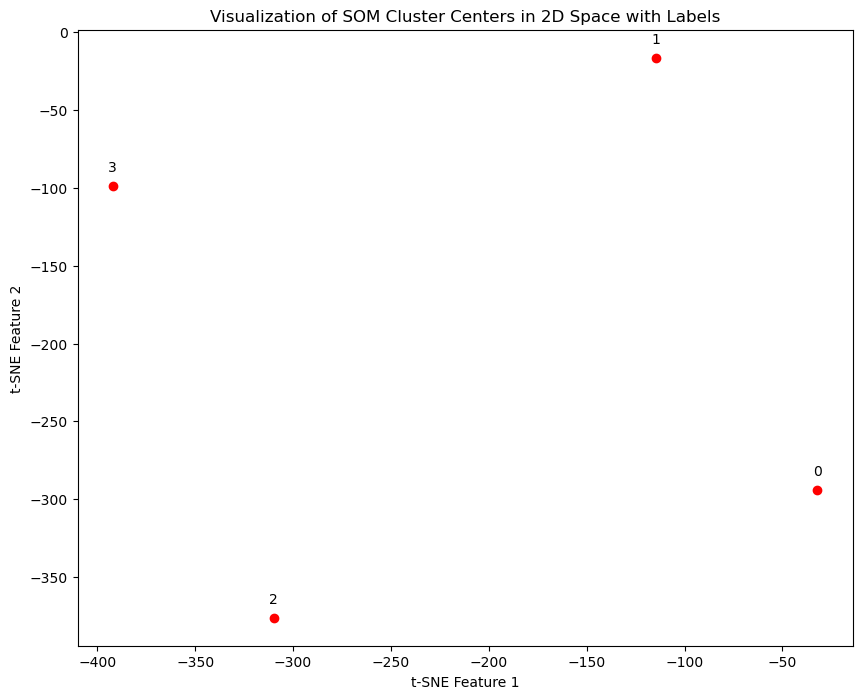

In [43]:
reshaped_weights = weights.reshape(-1, weights.shape[2])

tsne = TSNE(n_components=2, random_state=42)
weights_2d = tsne.fit_transform(reshaped_weights)

plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(weights_2d):
    plt.scatter(x, y, color='red', marker='o')
    plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Visualization of SOM Cluster Centers in 2D Space with Labels')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

#### Fuzzy C-means

In [44]:
import skfuzzy as fuzz

Длина cluster_membership: 336
Размер df_2_fuzzy: (16, 336)


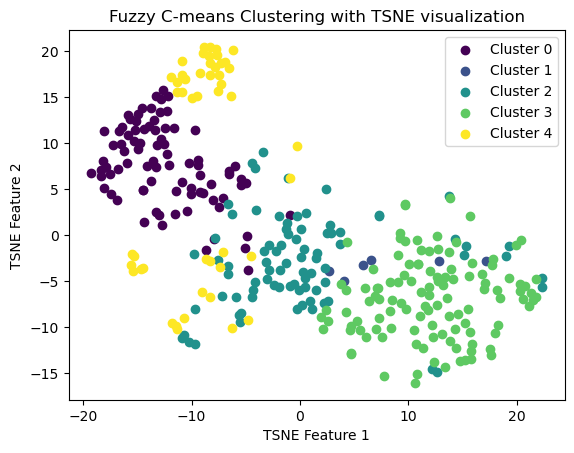

In [45]:
n_clusters = 5 
max_iter = 1000
df_2_fuzzy = df_2.values.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df_2_fuzzy, n_clusters, m=2, error=0.005, maxiter=1000)

cluster_membership = np.argmax(u, axis=0)

print("Длина cluster_membership:", len(cluster_membership))
print("Размер df_2_fuzzy:", df_2_fuzzy.shape)

tsne = TSNE(n_components=2, random_state=42)
df_2_tsne = tsne.fit_transform(df_2_fuzzy.T)

fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for j in range(n_clusters):
    idx = cluster_membership == j
    ax.scatter(df_2_tsne[idx, 0], df_2_tsne[idx, 1], color=colors[j], label=f'Cluster {j}')

ax.legend()
plt.title('Fuzzy C-means Clustering with TSNE visualization')
plt.xlabel('TSNE Feature 1')
plt.ylabel('TSNE Feature 2')
plt.show()

In [46]:
fuzzy_centers = pd.DataFrame(cntr)
#fuzzy_centers.to_excel('fuzzy_centers.xlsx')

In [47]:
print("Размер DataFrame:", df_2.shape)
print("Размер массива лейблов:", len(cluster_membership))

if len(cluster_membership) == df_2.shape[0]:
    df_2_fuzzy_labels = df_2.copy()
    df_2_fuzzy_labels['Cluster_Labels'] = cluster_membership

#df_2_fuzzy_labels.to_excel('df_2_fuzzy_labels.xlsx')
df_2_fuzzy_labels

Размер DataFrame: (336, 16)
Размер массива лейблов: 336


,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля,Cluster_Labels
Банк,,,,,,,,,,,,,,,,,
Сбербанк,0.000952,1.206493e-05,0.129813,0.026415,0.449607,0.308638,0.007065,0.014058,0.021119,0.042321,0.292119,0.350590,0.092941,0.018406,0.153205,0.092739,3
ВТБ,0.003354,0.000000e+00,0.184503,0.042916,0.424960,0.204919,0.006927,0.026645,0.030429,0.075347,0.194696,0.492168,0.081859,0.008043,0.072620,0.150614,3
Газпромбанк,0.002000,0.000000e+00,0.107434,0.040265,0.707183,0.054292,0.005505,0.007829,0.027098,0.048395,0.100437,0.502484,0.160175,0.019816,0.078182,0.138906,3
Альфа-Банк,0.003741,1.291383e-07,0.134795,0.001991,0.459535,0.254568,0.007232,0.011550,0.065584,0.061004,0.179709,0.438429,0.193794,0.028752,0.108740,0.050576,3
МКБ,0.004365,0.000000e+00,0.177455,0.001694,0.602633,0.044486,0.019442,0.002068,0.104695,0.043163,0.110018,0.491663,0.059327,0.006559,0.081392,0.251041,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
АЗИЯПЭЙ,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.348959,0.001577,0.647667,0.001797,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4
Промсвязьинвест,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.956269,0.041518,0.000000,0.278054,0.278054,0.000000,0.443891,0.000000,0
Петербургский Расчетный Центр,0.001231,0.000000e+00,0.000000,0.000266,0.000000,0.000000,0.011649,0.023612,0.941760,0.021482,0.000000,0.007266,0.007266,0.000000,0.985469,0.000000,4


In [48]:
silhouette_avg = silhouette_score(df_2, df_2_fuzzy_labels['Cluster_Labels'])
davies_bouldin = davies_bouldin_score(df_2, df_2_fuzzy_labels['Cluster_Labels'])
calinski_harabasz = calinski_harabasz_score(df_2, df_2_fuzzy_labels['Cluster_Labels'])
print(f'silhouette_avg = {round(silhouette_avg,2)}')
print(f'davies_bouldin = {round(davies_bouldin,2)}')
print(f'calinski_harabasz = {round(calinski_harabasz,2)}')

silhouette_avg = 0.02
davies_bouldin = 2.65
calinski_harabasz = 61.79


In [49]:
df_2_fuzzy_labels[df_2_fuzzy_labels['Cluster_Labels'] == 1]

,А_акции_доля,А_векселя_доля,А_облигации_доля,А_капиталы_доля,А_корп_кредиты_доля,А_физлица_доля,А_ЛОРО_доля,А_осн_средства_доля,А_мбк_доля,А_прочие_доля,П_вклады_физлиц_доля,П_корп_средства_доля,П_счета_физлиц_доля,П_облигации_векселя_доля,П_капитал_доля,П_мбк_доля,Cluster_Labels
Банк,,,,,,,,,,,,,,,,,
Открытие,0.000023,0.0,0.040684,0.028535,0.371504,0.230035,0.029604,0.022274,0.236661,0.040680,0.220779,0.324063,0.107928,0.012864,0.194742,0.139623,1
Сургутнефтегазбанк,0.000220,0.0,0.068471,0.000000,0.112111,0.436003,0.000043,0.021575,0.263217,0.098361,0.266804,0.416723,0.098483,0.000000,0.210517,0.007473,1
Банк Солидарность,0.007250,0.0,0.193797,0.037598,0.304274,0.035899,0.035415,0.020433,0.283476,0.081857,0.382263,0.218830,0.140456,0.009523,0.233687,0.015241,1
РосДорБанк,0.000000,0.0,0.159089,0.002653,0.455499,0.031977,0.001615,0.006989,0.313792,0.028388,0.313225,0.378837,0.189522,0.015273,0.087910,0.015232,1
Уралпромбанк,0.001365,0.0,0.321545,0.000000,0.160287,0.163199,0.000668,0.052559,0.267788,0.032589,0.275902,0.223838,0.206023,0.000000,0.294237,0.000000,1
Столичный Кредит,0.004645,0.0,0.264028,0.000000,0.258936,0.082250,0.000079,0.113792,0.162828,0.113441,0.164586,0.307198,0.306494,0.000000,0.221722,0.000000,1
